In [ ]:
import ee
ee.Authenticate()



Successfully saved authorization token.


In [9]:
%run /usr2/postdoc/chishan/research/DailyNotes/20251017_2.py


Export-to-Asset task started: pure_cluster_samples_19 -> projects/GLANCE/SCRATCH/pure_cluster_samples_SR19_400


In [10]:
%run /usr2/postdoc/chishan/research/DailyNotes/20251017_0.py


Export-to-Asset task started: pure_cluster_samples_43 -> projects/GLANCE/SCRATCH/pure_cluster_samples_SR43_400


In [ ]:
# check_tile.py
import sys
import rasterio
from rasterio.enums import Resampling

folder='/projectnb/measures/products/SA/v001/DAAC/LC/'

path = folder + 'GLANCE.A20010701.h14v45.001.20240219.SA.LC.tif'

with rasterio.open(path) as src:
    prof = src.profile
    print("driver:", src.driver)
    print("dtype:", src.dtypes)
    print("count:", src.count)
    print("width x height:", src.width, "x", src.height)
    print("crs:", src.crs)
    print("transform:", src.transform)
    print("profile keys:", {k: prof.get(k) for k in ['tiled','blockxsize','blockysize','compress','interleave']})
    oviews = src.overviews(1)
    print("overviews (levels):", oviews)
    try:
        # size of first block
        print("block shape band1:", src.block_shapes[0])
    except Exception:
        pass
    # optional test: read a small window (should be fast for COGs if tiled)
    w = src.read(1, window=((0, min(256, src.height)), (0, min(256, src.width))))
    print("read sample window shape:", w.shape)


driver: GTiff
dtype: ('uint8',)
count: 1
width x height: 5000 x 5000
crs: EPSG:10603
transform: | 30.00, 0.00,-4818770.00|
| 0.00,-30.00,-1850295.00|
| 0.00, 0.00, 1.00|
profile keys: {'tiled': True, 'blockxsize': 512, 'blockysize': 512, 'compress': 'lzw', 'interleave': 'band'}
overviews (levels): [2, 4, 8, 16]
block shape band1: (512, 512)
read sample window shape: (256, 256)


In [10]:
# ...existing code...
import odc.geo.xr
import rioxarray as rxr

# 打开 MapBiomas 影像（例如 AMZ.2016.M.tif）
mapbiomas = rxr.open_rasterio("/projectnb/modislc/users/chishan/data/MapBiomas/MAPBIOMAS/AMZ.2016.M.tif").squeeze("band", drop=True)

# # 如果需要使用 odc accessor，将 DataArray 转为 Dataset
# mapbiomas_ds = mapbiomas.to_dataset(name="mapbiomas")

# # 查看空间信息
# print(mapbiomas_ds.rio.crs)
# print(mapbiomas_ds.rio.resolution())
# print(mapbiomas_ds.rio.bounds())

# # 得到 geobox 对象（在 Dataset 上可用）
# geo_box = mapbiomas_ds.odc.geobox
# print(geo_box)
# ...existing code...


In [11]:
geo_box = mapbiomas.odc.geobox
print(geo_box)


GeoBox((243684, 339821), Affine(9e-05, 0.0, -73.98318216,
       0.0, -9e-05, 5.26958083), CRS('GEOGCS["SIRGAS 2000",DATUM["Sistema_de_Referencia_Geocentrico_para_las_AmericaS_2000",SPHEROID["GRS 1980",6378137,298.257222101004,AUTHORITY["EPSG","7019"]],AUTHORITY["EPSG","6674"]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AXIS["Latitude",NORTH],AXIS["Longitude",EAST]]'))


In [19]:
from odc.stac import load, stac_load
import pystac

cat = pystac.Catalog.from_file("/projectnb/modislc/users/chishan/stac_glance_SA/catalog.json")

# 载入所有 items（可筛时间/范围）
# items = list(cat.get_all_items())
# 只载入 2016 年的 items
# items = [it for it in cat.get_all_items()
#          if getattr(it, "datetime", None) is not None and it.datetime.year == 2016]


In [ ]:
cat


<Catalog id=glance_catalog>

In [13]:
import pystac

print(pystac.__version__)


1.14.1


In [24]:
from datetime import datetime
start = datetime(2016, 1, 1)
end   = datetime(2016, 12, 31)

from datetime import datetime

def drop_tz(dt):
    return dt.replace(tzinfo=None) if dt.tzinfo else dt

items_2016 = [
    i for i in cat.get_items(recursive=True)
    if i.datetime and 2016 == drop_tz(i.datetime).year
]


In [ ]:
items_2016


[<Item id=glance_2016_h14v45>,
 <Item id=glance_2016_h14v46>,
 <Item id=glance_2016_h16v44>,
 <Item id=glance_2016_h16v45>,
 <Item id=glance_2016_h17v44>,
 <Item id=glance_2016_h17v45>,
 <Item id=glance_2016_h22v21>,
 <Item id=glance_2016_h22v22>,
 <Item id=glance_2016_h22v23>,
 <Item id=glance_2016_h23v22>,
 <Item id=glance_2016_h23v23>,
 <Item id=glance_2016_h23v24>,
 <Item id=glance_2016_h24v22>,
 <Item id=glance_2016_h24v23>,
 <Item id=glance_2016_h28v15>,
 <Item id=glance_2016_h28v16>,
 <Item id=glance_2016_h29v12>,
 <Item id=glance_2016_h29v13>,
 <Item id=glance_2016_h29v15>,
 <Item id=glance_2016_h29v16>,
 <Item id=glance_2016_h29v17>,
 <Item id=glance_2016_h29v19>,
 <Item id=glance_2016_h30v11>,
 <Item id=glance_2016_h30v12>,
 <Item id=glance_2016_h30v13>,
 <Item id=glance_2016_h30v15>,
 <Item id=glance_2016_h30v16>,
 <Item id=glance_2016_h30v17>,
 <Item id=glance_2016_h30v19>,
 <Item id=glance_2016_h30v21>,
 <Item id=glance_2016_h30v22>,
 <Item id=glance_2016_h30v23>,
 <Item i

In [ ]:
items=cat.get_items(recursive=True)


In [26]:
ds = load(
    items_2016,
    geobox=mapbiomas.odc.geobox,   # 你的 MapBiomas template
    chunks={"x": 2048, "y": 2048},
    groupby="solar_day",
)
print(ds)


<xarray.Dataset> Size: 331GB
Dimensions:      (latitude: 243684, longitude: 339821, time: 1)
Coordinates:
  * latitude     (latitude) float64 2MB 5.27 5.269 5.269 ... -16.66 -16.66
  * longitude    (longitude) float64 3MB -73.98 -73.98 -73.98 ... -43.4 -43.4
    spatial_ref  int32 4B 4674
  * time         (time) datetime64[ns] 8B 2016-07-01
Data variables:
    data         (time, latitude, longitude) float32 331GB dask.array<chunksize=(1, 2048, 2048), meta=np.ndarray>


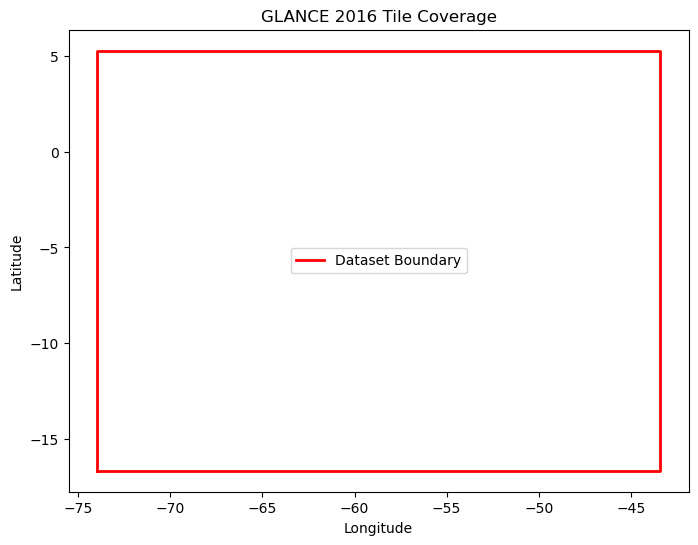

In [ ]:
import matplotlib.pyplot as plt

ds_sub = ds.isel(time=0)  # 单时间层
extent = [
    float(ds_sub.longitude.min()), float(ds_sub.longitude.max()),
    float(ds_sub.latitude.min()), float(ds_sub.latitude.max())
]

plt.figure(figsize=(8, 6))
plt.title("GLANCE 2016 Tile Coverage")
plt.xlabel("Longitude")
plt.ylabel("Latitude")

# 绘制空矩形边界框
plt.plot(
    [extent[0], extent[1], extent[1], extent[0], extent[0]],
    [extent[2], extent[2], extent[3], extent[3], extent[2]],
    'r-', lw=2, label="Dataset Boundary"
)

plt.legend()
plt.show()


In [31]:
import hvplot.xarray  # noqa

ds.isel(time=0).data.hvplot.image(
    rasterize=True, cmap='viridis', width=800, height=600,
    x='longitude', y='latitude', title='GLANCE 2016 Coverage'
)


KeyboardInterrupt: 

In [1]:
from dask.distributed import Client

# 启动本地多核集群
client = Client(n_workers=1, threads_per_worker=8)
print(client.dashboard_link)  # 查看 Dask 仪表板


http://127.0.0.1:8787/status


2025-10-17 21:51:09,278 - distributed.scheduler - ERROR - Task ('finalize-hlgfinalizecompute-resample_2d-from-value-4bcda18afd5f18aa9d9e9da74a4d07c1', 0, 0) has 308.49 GiB worth of input dependencies, but worker tcp://127.0.0.1:39183 has memory_limit set to 125.31 GiB.


In [2]:
from odc.stac import load, stac_load
import pystac
# ...existing code...
import odc.geo.xr
import rioxarray as rxr

# 打开 MapBiomas 影像（例如 AMZ.2016.M.tif）
mapbiomas = rxr.open_rasterio("/projectnb/modislc/users/chishan/data/MapBiomas/MAPBIOMAS/AMZ.2016.M.tif").squeeze("band", drop=True)

cat = pystac.Catalog.from_file("/projectnb/modislc/users/chishan/stac_glance_SA/catalog.json")

from datetime import datetime
start = datetime(2016, 1, 1)
end   = datetime(2016, 12, 31)

from datetime import datetime

def drop_tz(dt):
    return dt.replace(tzinfo=None) if dt.tzinfo else dt

items_2016 = [
    i for i in cat.get_items(recursive=True)
    if i.datetime and 2016 == drop_tz(i.datetime).year
]

# 然后正常加载数据
ds = load(
    items_2016,
    geobox=mapbiomas.odc.geobox,
    chunks={"x": 2048, "y": 2048},  # 已经是 chunked
    groupby="solar_day",
)

# hvplot 会自动利用 Dask 的并行计算
ds.isel(time=0).data.hvplot.image(
    rasterize=True, cmap='viridis', width=800, height=600,
    x='longitude', y='latitude', title='GLANCE 2016 Coverage'
)


AttributeError: 'DataArray' object has no attribute 'hvplot'

In [3]:
from odc.stac import load, stac_load
import pystac
import odc.geo.xr
import rioxarray as rxr
import hvplot.xarray  # 添加这行！

# hvplot 会自动利用 Dask 的并行计算
ds.isel(time=0).data.hvplot.image(
    rasterize=True, cmap='viridis', width=800, height=600,
    x='longitude', y='latitude', title='GLANCE 2016 Coverage'
)


MemoryError: Task ('finalize-hlgfinalizecompute-resample_2d-from-value-4bcda18afd5f18aa9d9e9da74a4d07c1', 0, 0) has 308.49 GiB worth of input dependencies, but worker tcp://127.0.0.1:39183 has memory_limit set to 125.31 GiB.

:DynamicMap   []
   :Image   [longitude,latitude]   (data)

In [ ]:
# 用完后关闭
client.close()
